<a href="https://colab.research.google.com/github/Kundai10/AISummative/blob/main/Copy_of_final_AI_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# import ydata_profiling as pp
# import pandas_profiling as pp


import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
# %matplotlib inline
import matplotlib.pyplot as plt


In [15]:
# !pip install pandas_profiling


In [16]:
data = pd.read_csv('/content/drive/My Drive/Model/data.csv')

In [17]:
data.shape # (rows, columns)

(2000, 15)

In [18]:
data.head(10)

Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0               1                           1                11.28   
1               2                           0                 9.75   
2               3                           1                10.79   
3               4                           0                11.00   
4               5                           1                14.17   
5               6                           0                11.64   
6               7                           1                11.69   
7               8                           0                12.70   
8               9                           0                10.88   
9              10                           1                14.56   

   Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
0                          0.90   34   23    1        1.0        0   
1                          0.23   54   33    1        NaN        0   
2                          0.91   70   49    0        NaN        0   
3                          0.43   71   50    0        NaN        0   
4                          0.83   52   19    0        NaN        0   
5                          0.54   23   48    0        NaN        1   
6                          0.75   43   41    1        1.0        0   
7                          0.41   48   20    0        NaN        0   
8                          0.68   72   44    0        NaN        0   
9                          0.61   40   44    0        NaN        0   

   Physical_activity  salt_content_in_the_diet  alcohol_consumption_per_day  \
0              45961                     48071                          NaN   
1              26106                     25333                        205.0   
2               9995                     29465                         67.0   
3              10635                      7439                        242.0   
4              15619                     49644                        397.0   
5              27042                      7513                          NaN   
6              38369                     32967                        206.0   
7              29781                     26749                        134.0   
8                814                      9607                         99.0   
9               1278                     12715                         95.0   

   Level_of_Stress  Chronic_kidney_disease  Adrenal_and_thyroid_disorders  
0                2                       1                              1  
1                3                       0                              0  
2                2                       1                              0  
3                1                       1                              0  
4                2                       0                              0  
5                3                       0                              0  
6                3                       1                              1  
7                2                       0                              0  
8                3                       0                              0  
9                2                       0                              0

In [19]:
# information about the dataset
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [20]:
#description about dataset
data.describe()

Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
count     2000.000000                 2000.000000          2000.000000   
mean      1000.500000                    0.493500            11.710035   
std        577.494589                    0.500083             2.186701   
min          1.000000                    0.000000             8.100000   
25%        500.750000                    0.000000            10.147500   
50%       1000.500000                    0.000000            11.330000   
75%       1500.250000                    1.000000            12.945000   
max       2000.000000                    1.000000            17.560000   

       Genetic_Pedigree_Coefficient          Age          BMI          Sex  \
count                   1908.000000  2000.000000  2000.000000  2000.000000   
mean                       0.494817    46.558500    30.081500     0.496000   
std                        0.291736    17.107832    11.761208     0.500109   
min                        0.000000    18.000000    10.000000     0.000000   
25%                        0.240000    32.000000    20.000000     0.000000   
50%                        0.490000    46.000000    30.000000     0.000000   
75%                        0.740000    62.000000    40.000000     1.000000   
max                        1.000000    75.000000    50.000000     1.000000   

        Pregnancy      Smoking  Physical_activity  salt_content_in_the_diet  \
count  442.000000  2000.000000        2000.000000               2000.000000   
mean     0.450226     0.509500       25254.424500              24926.097000   
std      0.498080     0.500035       14015.439623              14211.692586   
min      0.000000     0.000000         628.000000                 22.000000   
25%      0.000000     0.000000       13605.750000              13151.750000   
50%      0.000000     1.000000       25353.000000              25046.500000   
75%      1.000000     1.000000       37382.250000              36839.750000   
max      1.000000     1.000000       49980.000000              49976.000000   

       alcohol_consumption_per_day  Level_of_Stress  Chronic_kidney_disease  \
count                  1758.000000      2000.000000               2000.0000   
mean                    251.008532         2.012500                  0.5050   
std                     143.651884         0.823822                  0.5001   
min                       0.000000         1.000000                  0.0000   
25%                     126.250000         1.000000                  0.0000   
50%                     250.000000         2.000000                  1.0000   
75%                     377.750000         3.000000                  1.0000   
max                     499.000000         3.000000                  1.0000   

       Adrenal_and_thyroid_disorders  
count                    2000.000000  
mean                        0.443500  
std                         0.496922  
min                         0.000000  
25%                         0.000000  
50%                         0.000000  
75%                         1.000000  
max                         1.000000

In [21]:
data.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [22]:
data.notnull().sum()

Patient_Number                   2000
Blood_Pressure_Abnormality       2000
Level_of_Hemoglobin              2000
Genetic_Pedigree_Coefficient     1908
Age                              2000
BMI                              2000
Sex                              2000
Pregnancy                         442
Smoking                          2000
Physical_activity                2000
salt_content_in_the_diet         2000
alcohol_consumption_per_day      1758
Level_of_Stress                  2000
Chronic_kidney_disease           2000
Adrenal_and_thyroid_disorders    2000
dtype: int64

In [23]:
data.dtypes

Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

In [24]:
# Checking for missing values
# Returning the percentage of missing values in each column
for c in data.columns:
    print('{} -   {}%'.format(c,round((np.mean(data[c].isnull()))*100)))

Patient_Number -   0%
Blood_Pressure_Abnormality -   0%
Level_of_Hemoglobin -   0%
Genetic_Pedigree_Coefficient -   5%
Age -   0%
BMI -   0%
Sex -   0%
Pregnancy -   78%
Smoking -   0%
Physical_activity -   0%
salt_content_in_the_diet -   0%
alcohol_consumption_per_day -   12%
Level_of_Stress -   0%
Chronic_kidney_disease -   0%
Adrenal_and_thyroid_disorders -   0%


In [25]:
# Drop irrelevant columns
data.drop(['Patient_Number', 'Pregnancy'], axis=1, inplace=True)


In [26]:
data.head(10)

Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0                           1                11.28   
1                           0                 9.75   
2                           1                10.79   
3                           0                11.00   
4                           1                14.17   
5                           0                11.64   
6                           1                11.69   
7                           0                12.70   
8                           0                10.88   
9                           1                14.56   

   Genetic_Pedigree_Coefficient  Age  BMI  Sex  Smoking  Physical_activity  \
0                          0.90   34   23    1        0              45961   
1                          0.23   54   33    1        0              26106   
2                          0.91   70   49    0        0               9995   
3                          0.43   71   50    0        0              10635   
4                          0.83   52   19    0        0              15619   
5                          0.54   23   48    0        1              27042   
6                          0.75   43   41    1        0              38369   
7                          0.41   48   20    0        0              29781   
8                          0.68   72   44    0        0                814   
9                          0.61   40   44    0        0               1278   

   salt_content_in_the_diet  alcohol_consumption_per_day  Level_of_Stress  \
0                     48071                          NaN                2   
1                     25333                        205.0                3   
2                     29465                         67.0                2   
3                      7439                        242.0                1   
4                     49644                        397.0                2   
5                      7513                          NaN                3   
6                     32967                        206.0                3   
7                     26749                        134.0                2   
8                      9607                         99.0                3   
9                     12715                         95.0                2   

   Chronic_kidney_disease  Adrenal_and_thyroid_disorders  
0                       1                              1  
1                       0                              0  
2                       1                              0  
3                       1                              0  
4                       0                              0  
5                       0                              0  
6                       1                              1  
7                       0                              0  
8                       0                              0  
9                       0                              0

In [27]:
# data.replace(np.NaN,0)
data['alcohol_consumption_per_day'] = data['alcohol_consumption_per_day'].fillna(0)
data['Genetic_Pedigree_Coefficient'] = data['Genetic_Pedigree_Coefficient'].fillna(0)

In [28]:
data.isnull().any()

Blood_Pressure_Abnormality       False
Level_of_Hemoglobin              False
Genetic_Pedigree_Coefficient     False
Age                              False
BMI                              False
Sex                              False
Smoking                          False
Physical_activity                False
salt_content_in_the_diet         False
alcohol_consumption_per_day      False
Level_of_Stress                  False
Chronic_kidney_disease           False
Adrenal_and_thyroid_disorders    False
dtype: bool

In [29]:
# new_df.isnull().any()

In [30]:
# changing all the dtypes to float64
data = data.astype(np.float64)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   float64
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   2000 non-null   float64
 3   Age                            2000 non-null   float64
 4   BMI                            2000 non-null   float64
 5   Sex                            2000 non-null   float64
 6   Smoking                        2000 non-null   float64
 7   Physical_activity              2000 non-null   float64
 8   salt_content_in_the_diet       2000 non-null   float64
 9   alcohol_consumption_per_day    2000 non-null   float64
 10  Level_of_Stress                2000 non-null   float64
 11  Chronic_kidney_disease         2000 non-null   float64
 12  Adrenal_and_thyroid_disorders  2000 non-null   f

# Exploratory Data Analysis(EDA)

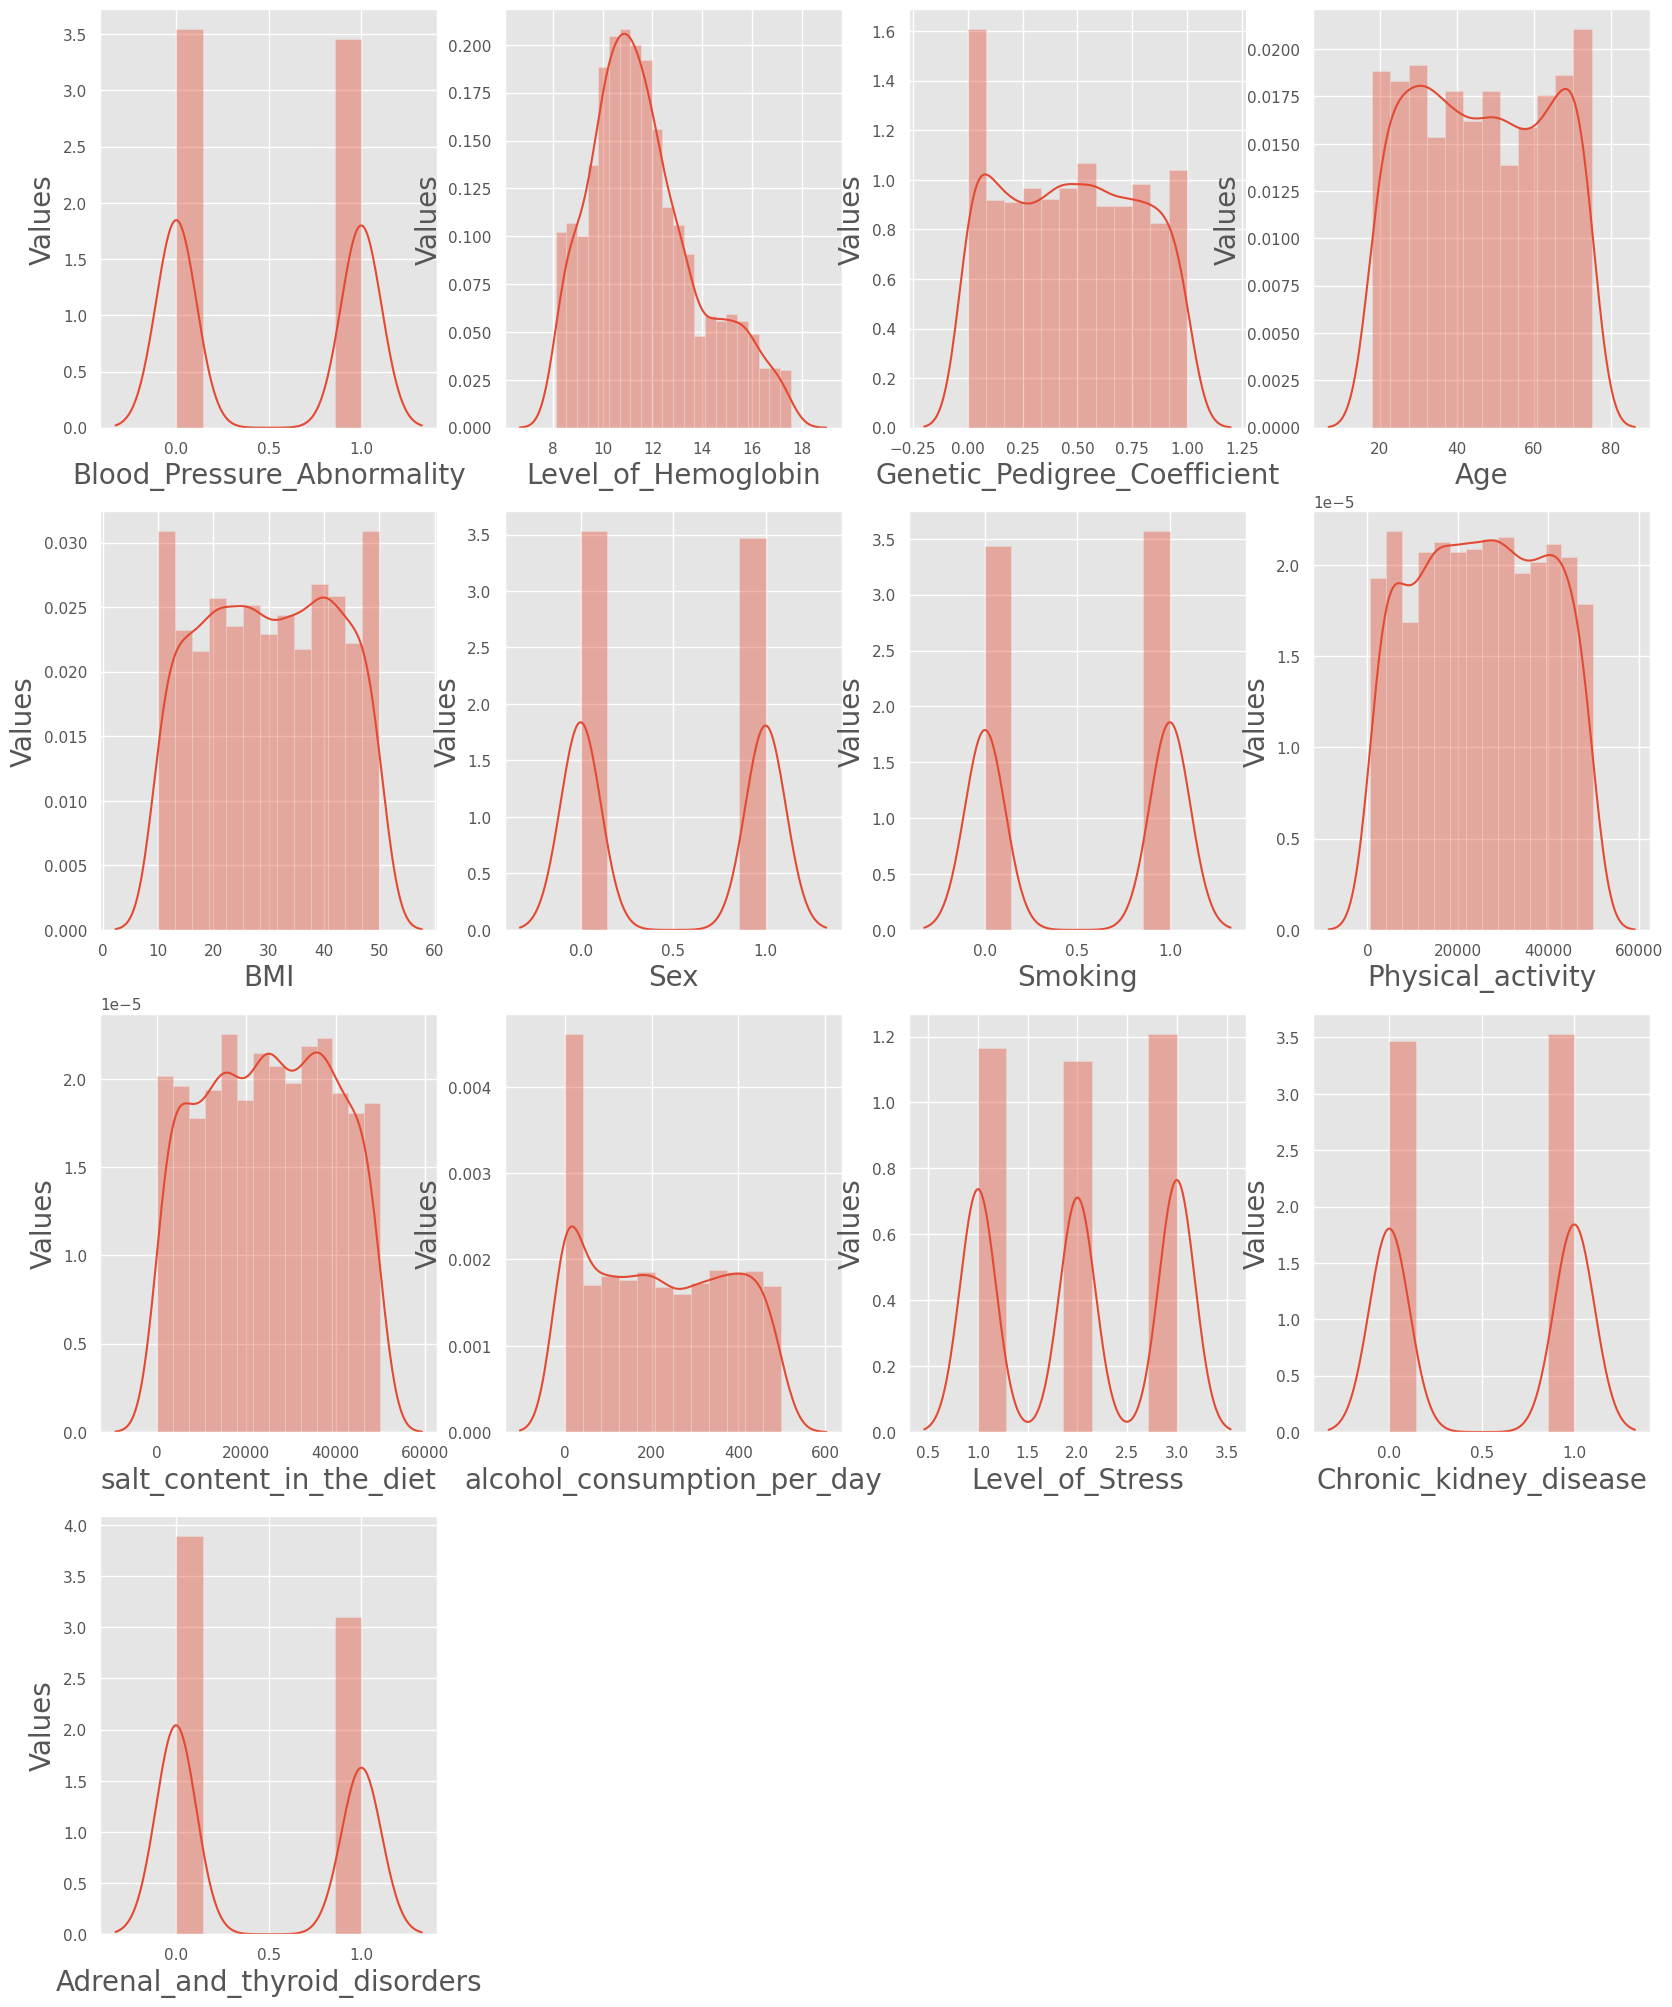

In [32]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

# Pandas Profiling

In [33]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.6 MB 21.3 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=d2f9a32c202c178f5c975faa0b45bc9662d321a1afda31bdfbbac86809380e6c
  Stored in directory: /tmp/pip-ephem-wheel-c

In [34]:
import pandas_profiling as pp
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

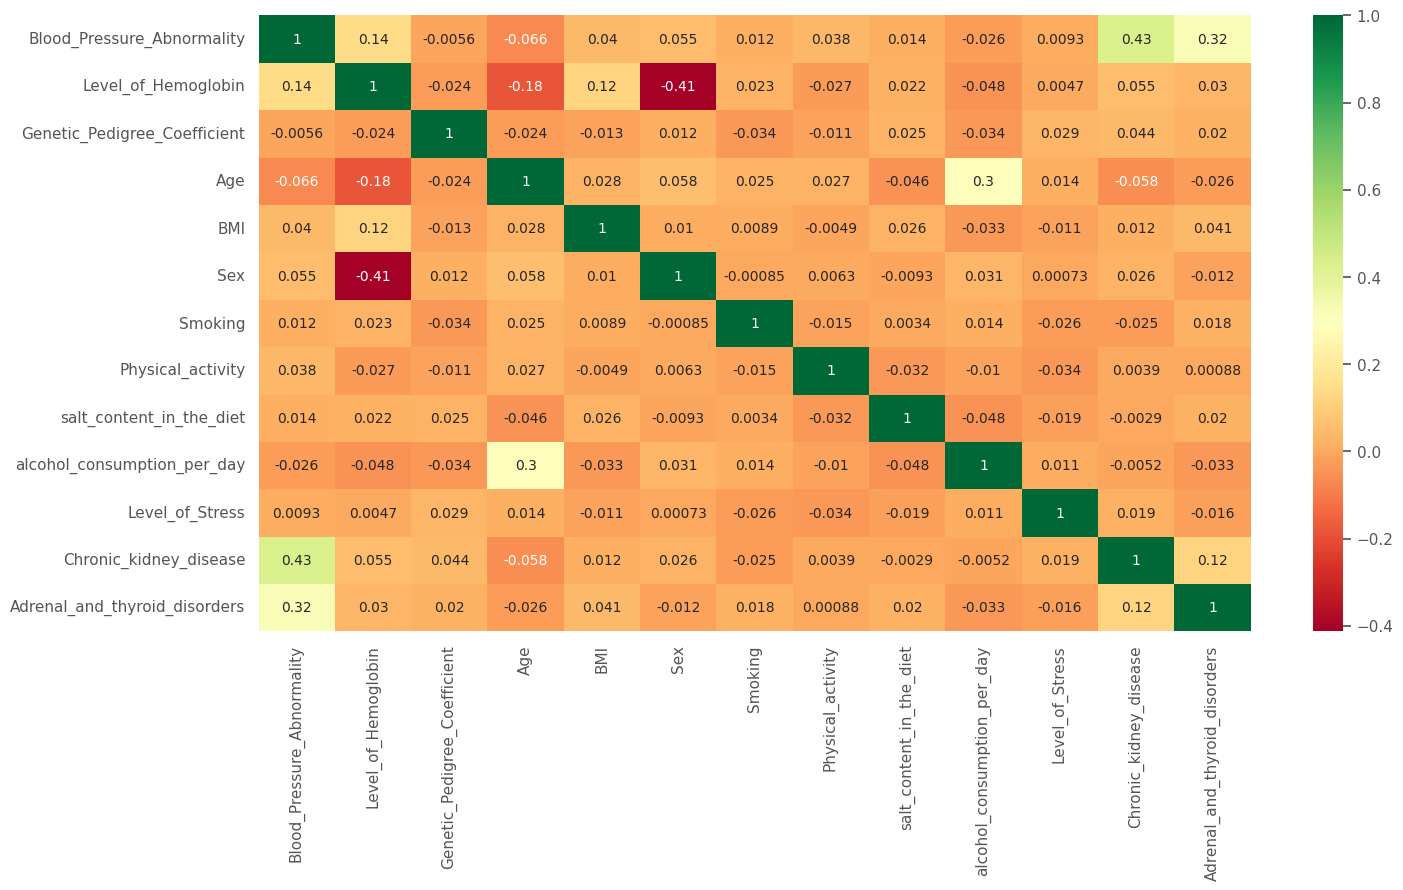

In [35]:
#Correlation matrix

# plt.figure(figsize = (16, 8))

# corr = data.corr()
# mask = np.triu(np.ones_like(corr, dtype = bool))
# sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
# plt.show()

plt.figure(figsize=[16,8])
corr = sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

In [36]:
#checking the variance
data.var()

Blood_Pressure_Abnormality       2.500828e-01
Level_of_Hemoglobin              4.781660e+00
Genetic_Pedigree_Coefficient     9.194290e-02
Age                              2.926779e+02
BMI                              1.383260e+02
Sex                              2.501091e-01
Smoking                          2.500348e-01
Physical_activity                1.964325e+08
salt_content_in_the_diet         2.019722e+08
alcohol_consumption_per_day      2.484221e+04
Level_of_Stress                  6.786831e-01
Chronic_kidney_disease           2.501001e-01
Adrenal_and_thyroid_disorders    2.469312e-01
dtype: float64

# Normalization

In [37]:
# data['Level_of_Hemoglobin']=np.log(data['Level_of_Hemoglobin'])
# data['Genetic_Pedigree_Coefficient']=np.log(data['Genetic_Pedigree_Coefficient'])
# data['Level_of_Stress']=np.log(data['Level_of_Stress'])

# np.var(data[["Level_of_Hemoglobin",'Genetic_Pedigree_Coefficient','Level_of_Stress']])

In [38]:
data.isnull().sum()


Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

# Features selection

In [39]:
features = data[['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Smoking', 'Physical_activity', 'salt_content_in_the_diet', 'alcohol_consumption_per_day', 'Level_of_Stress', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']]

In [40]:
x = data[['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Smoking', 'Physical_activity', 'salt_content_in_the_diet', 'alcohol_consumption_per_day', 'Level_of_Stress', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']]
y = data['Blood_Pressure_Abnormality']

# spliting the dataset

In [41]:
#spliting the dataset
# from sklearn.model_selection import train_test_split


In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)


In [43]:
# x=data.drop('Blood_Pressure_Abnormality',axis=1)    
# y=data['Blood_Pressure_Abnormality']

In [44]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [45]:
# x.info()

In [46]:
# data.isnull().sum()

# Data preprocessing

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression


In [50]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 73.07142857142857 %
Testing accuracy score of the model is: 67.66666666666666 %


In [51]:
print("Confusion matrix",confusion_matrix(y_test,y_pred))

print("Report",classification_report(y_test,y_pred))

Confusion matrix [[209 111]
 [ 83 197]]
Report               precision    recall  f1-score   support

         0.0       0.72      0.65      0.68       320
         1.0       0.64      0.70      0.67       280

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.68      0.68      0.68       600



# KNearestNeighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['KNN']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")


Training accuracy score of the model is: 79.28571428571428 %
Testing accuracy score of the model is: 77.5 %


In [53]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))

Confusion matrix of the model [[276  44]
 [ 91 189]]
Classification Report               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       320
         1.0       0.81      0.68      0.74       280

    accuracy                           0.78       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.78      0.78      0.77       600



# SVM

In [54]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 88.35714285714286 %
Testing accuracy score of the model is: 81.83333333333334 %


In [55]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))
print("Classification Report",classification_report(y_test,y_pred2))

Confusion matrix of the model [[254  66]
 [ 43 237]]
Classification Report               precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       320
         1.0       0.78      0.85      0.81       280

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 83.66666666666667 %


In [57]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))
print("Classification Report",classification_report(y_test,y_pred3))

Confusion matrix of the model [[263  57]
 [ 41 239]]
Classification Report               precision    recall  f1-score   support

         0.0       0.87      0.82      0.84       320
         1.0       0.81      0.85      0.83       280

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



In [58]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(dtc, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [59]:
grid_search.best_score_

0.8578571428571429

In [60]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'splitter': 'best'}

In [61]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dtc2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='random')

In [62]:
y_pred4 = dtc2.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
accuracies['DT2']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc2.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 97.14285714285714 %
Testing accuracy score of the model is: 81.5 %


In [63]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred4))

print("Classification Report",classification_report(y_test,y_pred4))

Confusion matrix of the model [[262  58]
 [ 53 227]]
Classification Report               precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       320
         1.0       0.80      0.81      0.80       280

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.82      0.81      0.82       600



In [64]:
# update dictionary
accuracies['DT']=acc4*100
del accuracies['DT2']

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 92.42857142857143 %
Testing accuracy score of the model is: 86.33333333333333 %


In [66]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))

Confusion matrix of the model [[270  50]
 [ 32 248]]
Classification Report               precision    recall  f1-score   support

         0.0       0.89      0.84      0.87       320
         1.0       0.83      0.89      0.86       280

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.87      0.86      0.86       600



# Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 92.92857142857143 %
Testing accuracy score of the model is: 89.83333333333333 %


# XGBoost

In [68]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
y_pred7 = xgb.predict(x_test)

acc7=accuracy_score(y_test,y_pred7)

accuracies['XGBoost']=acc7*100
print("Training accuracy score of the model is:",accuracy_score(y_train, xgb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred7)*100,"%")

Training accuracy score of the model is: 91.28571428571428 %
Testing accuracy score of the model is: 90.0 %


In [70]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred7))

print("Classification Report",classification_report(y_test,y_pred7))


Confusion matrix of the model [[294  26]
 [ 34 246]]
Classification Report               precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       320
         1.0       0.90      0.88      0.89       280

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



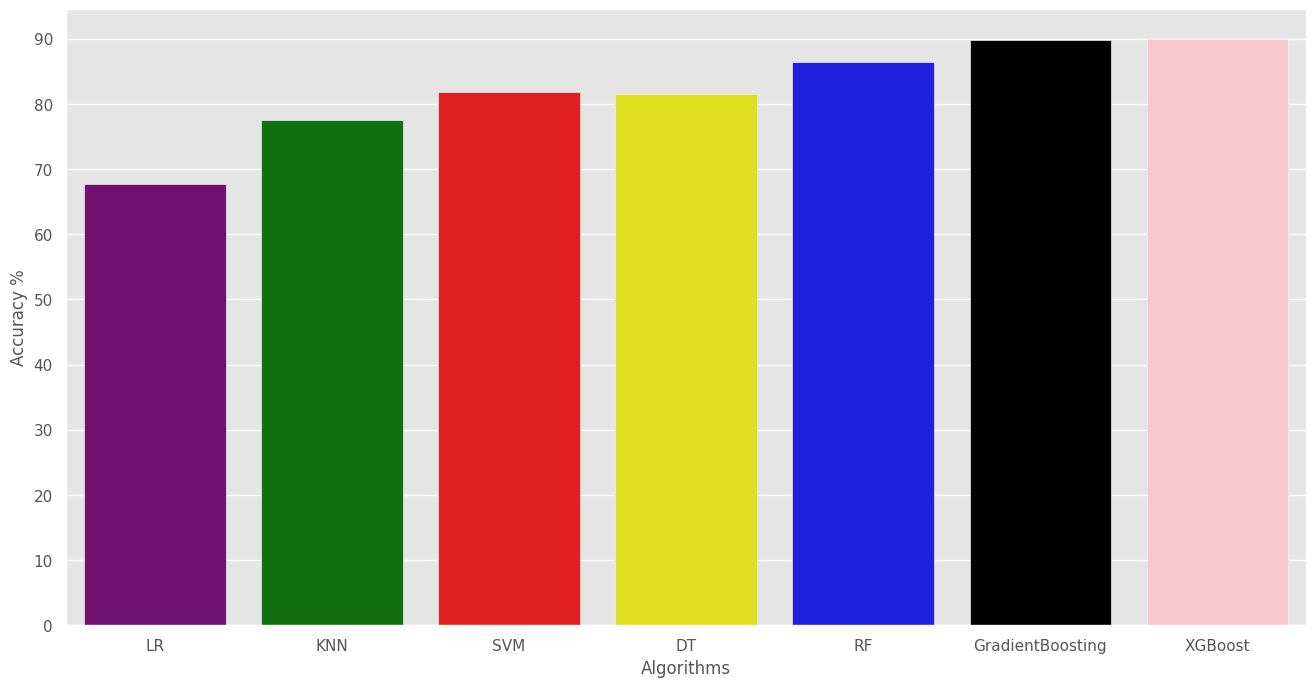

In [71]:
colors = ["purple", "green", "Red", "yellow","blue","black", "pink" ]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [72]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XgBoost'],
    'Score': [acc, acc1, acc2, acc4, acc5, acc6, acc7]
})

models.sort_values(by = 'Score', ascending = False)

Model     Score
6              XgBoost  0.900000
5    Gradient Boosting  0.898333
4        Random Forest  0.863333
2                  SVM  0.818333
3        Decision Tree  0.815000
1                  KNN  0.775000
0  Logistic Regression  0.676667

In [73]:
import pickle
model = xgb
pickle.dump(model, open("model.pkl",'wb'))

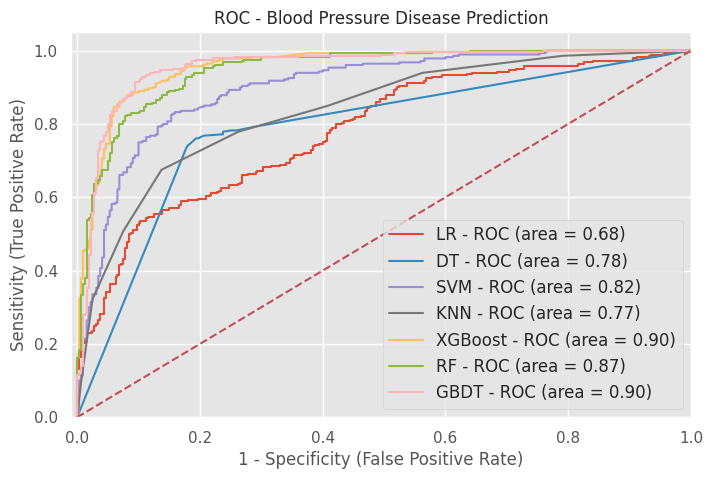

In [74]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc2,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rfc,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Blood Pressure Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_bp.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[67.67, 81.5, 81.83, 77.5, 90.0, 86.33, 89.83]
[67.83, 80.49, 82.01, 76.88000000000001, 89.87, 86.81, 89.73]


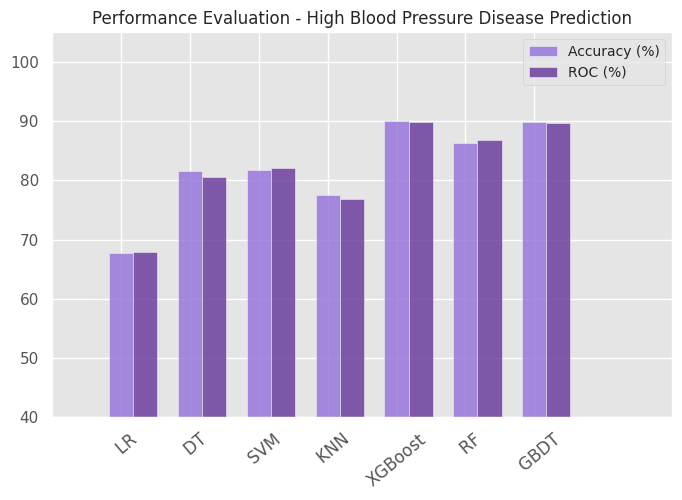

In [75]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc2,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rfc,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(acc,4), 100*round(acc4,4), 100*round(acc2,4), 100*round(acc1,4), 100*round(acc7,4), 
                  100*round(acc5,4), 100*round(acc6,4)]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([40, 105])

plt.title('Performance Evaluation - High Blood Pressure Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("blood_pressure.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# import pickle

In [77]:
# pickle.dump(xgb, open('model.pkl', 'wb'))

In [78]:
# model = pickle.load(open('model.pkl', 'rb'))
# print(model)

In [81]:
import pickle

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[11, 0.43, 71, 50, 0,0,10635,7439,242,1,1,0]]))

[1]


In [83]:
from google.colab import files
import pickle

model = xgb # your trained model object
file_path = 'model.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(model, f)

# Download the file from Colab to your local machine
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
import pickle

# train and save your model using scikit-learn or any other library
model = xgb # your trained model object
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)